In [288]:
import warnings
warnings.filterwarnings('ignore')

In [289]:
!pip install lime


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [290]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import lime
from lime import lime_tabular

In [291]:
import pandas as pd

df = pd.read_csv('post natal data.csv')
df.head()


,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [292]:
df.drop('Timestamp', axis=1, inplace=True)

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Age                                        1503 non-null   object
 1   Feeling sad or Tearful                     1503 non-null   object
 2   Irritable towards baby & partner           1497 non-null   object
 3   Trouble sleeping at night                  1503 non-null   object
 4   Problems concentrating or making decision  1491 non-null   object
 5   Overeating or loss of appetite             1503 non-null   object
 6   Feeling anxious                            1503 non-null   object
 7   Feeling of guilt                           1494 non-null   object
 8   Problems of bonding with baby              1503 non-null   object
 9   Suicide attempt                            1503 non-null   object
dtypes: object(10)
memory usage: 117.6+ K

In [294]:
for col in df:
    print(col, df[col].unique())

Age ['35-40' '40-45' '30-35' '45-50' '25-30']
Feeling sad or Tearful ['Yes' 'No' 'Sometimes']
Irritable towards baby & partner ['Yes' 'No' 'Sometimes' nan]
Trouble sleeping at night ['Two or more days a week' 'No' 'Yes']
Problems concentrating or making decision ['Yes' 'No' 'Often' nan]
Overeating or loss of appetite ['Yes' 'No' 'Not at all']
Feeling anxious ['Yes' 'No']
Feeling of guilt ['No' 'Yes' 'Maybe' nan]
Problems of bonding with baby ['Yes' 'Sometimes' 'No']
Suicide attempt ['Yes' 'No' 'Not interested to say']


In [295]:
df.isna().sum()

Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [296]:
df.dropna(axis=0, inplace=True)

In [297]:
df.isna().sum().sum()

np.int64(0)

In [298]:
df.head(5)

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


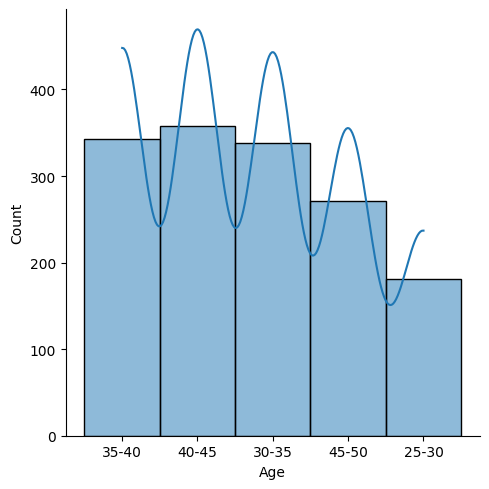

In [299]:
sns.displot(df['Age'], kde=True)

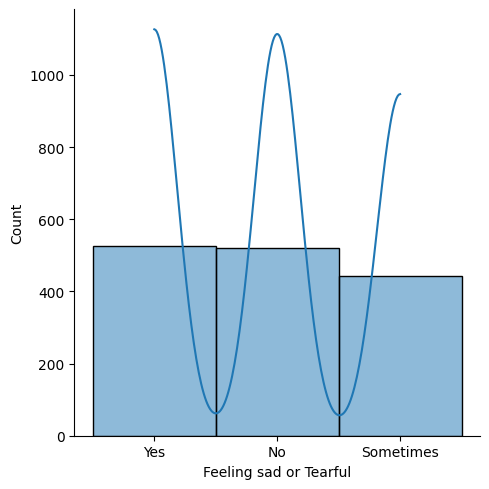

In [195]:
sns.displot(df['Feeling sad or Tearful'], kde=True)

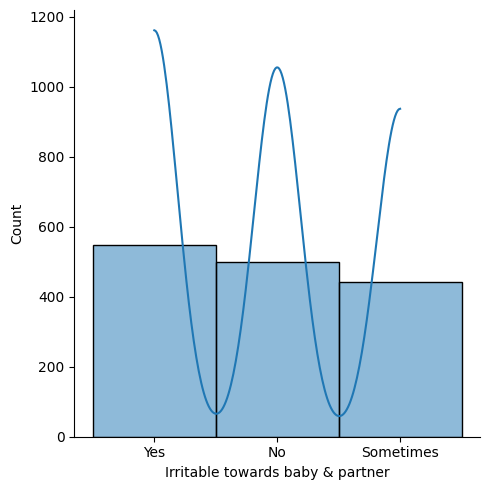

In [196]:
sns.displot(df['Irritable towards baby & partner'], kde=True)

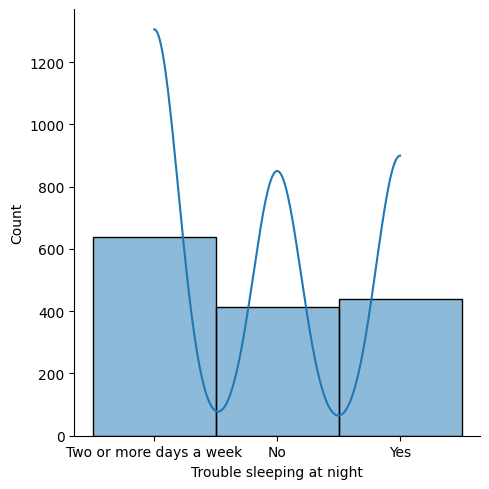

In [197]:
sns.displot(df['Trouble sleeping at night'], kde=True)

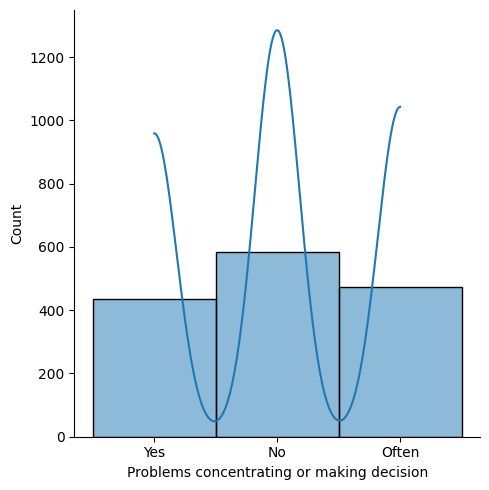

In [198]:
sns.displot(df['Problems concentrating or making decision'], kde=True)

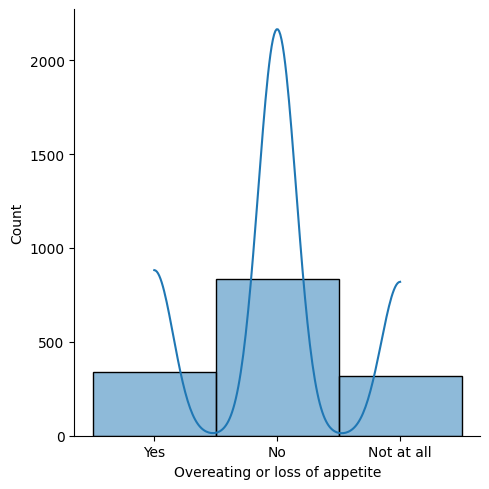

In [199]:
sns.displot(df['Overeating or loss of appetite'], kde=True)

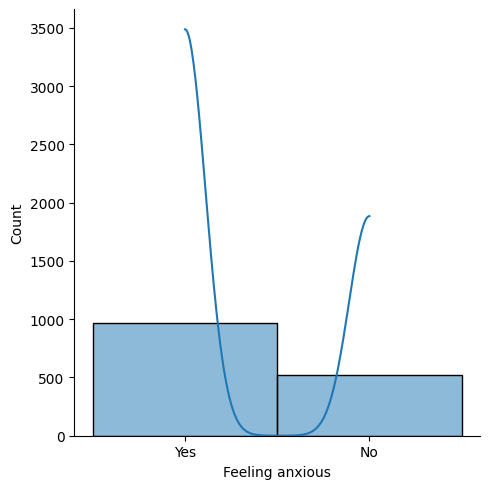

In [200]:
sns.displot(df['Feeling anxious'], kde=True)

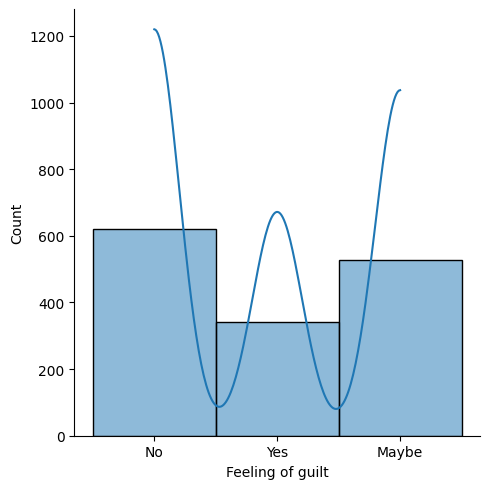

In [201]:
sns.displot(df['Feeling of guilt'], kde=True)

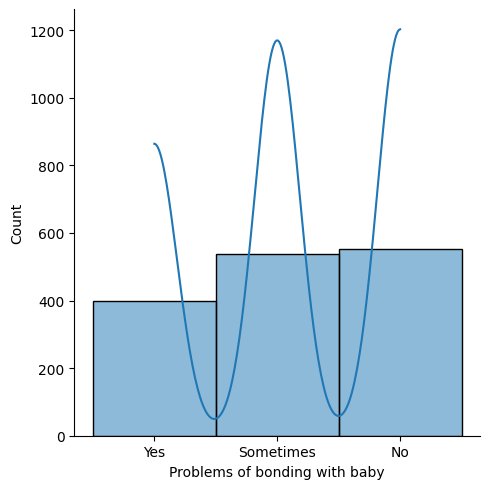

In [202]:
sns.displot(df['Problems of bonding with baby'], kde=True)

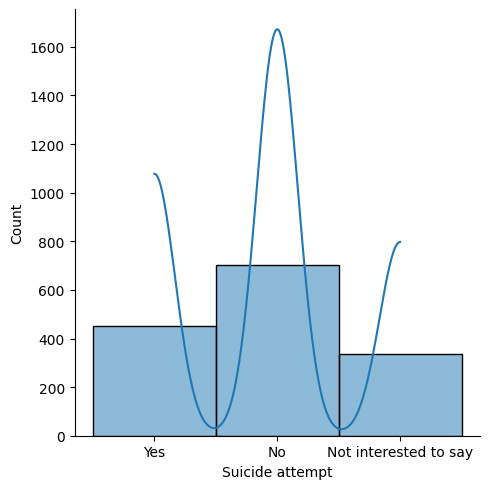

In [203]:
sns.displot(df['Suicide attempt'], kde=True)

In [301]:
age_dic = {'35-40':3, '40-45':4, '30-35':2,  '45-50':5, '25-30':1}
df['Age'].replace(age_dic, inplace=True)
df['Age']

0       3
1       4
2       3
3       3
4       4
       ..
1498    2
1499    1
1500    1
1501    1
1502    5
Name: Age, Length: 1491, dtype: int64

In [300]:
df_dic = {'Yes':1, 'No':0, 'Sometimes':2, 'Two or more days a week':2, 'Often':2, 'Not at all':2,'Not interested to say':2,'Maybe':2 }
df.replace(df_dic, inplace=True)
df

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,1,1,2,1,1,1,0,1,1
1,40-45,1,0,0,1,1,0,1,1,0
2,35-40,1,0,1,1,1,1,0,2,0
3,35-40,1,1,1,1,0,1,2,0,0
4,40-45,1,0,2,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,1,0,2,0,0,1,2,2,0
1499,25-30,2,0,0,2,0,1,2,1,0
1500,25-30,0,2,2,0,0,0,1,0,2
1501,25-30,0,2,1,2,0,1,0,0,0


In [302]:
"""label_encoders = {}
for column in ['Age','Feeling sad or Tearful', 'Irritable towards baby & partner',
               'Trouble sleeping at night', 'Problems concentrating or making decision',
               'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
               'Problems of bonding with baby', 'Suicide attempt']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])"""


"label_encoders = {}\nfor column in ['Age','Feeling sad or Tearful', 'Irritable towards baby & partner',\n               'Trouble sleeping at night', 'Problems concentrating or making decision',\n               'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',\n               'Problems of bonding with baby', 'Suicide attempt']:\n    label_encoders[column] = LabelEncoder()\n    df[column] = label_encoders[column].fit_transform(df[column])"

**Class Distribution**

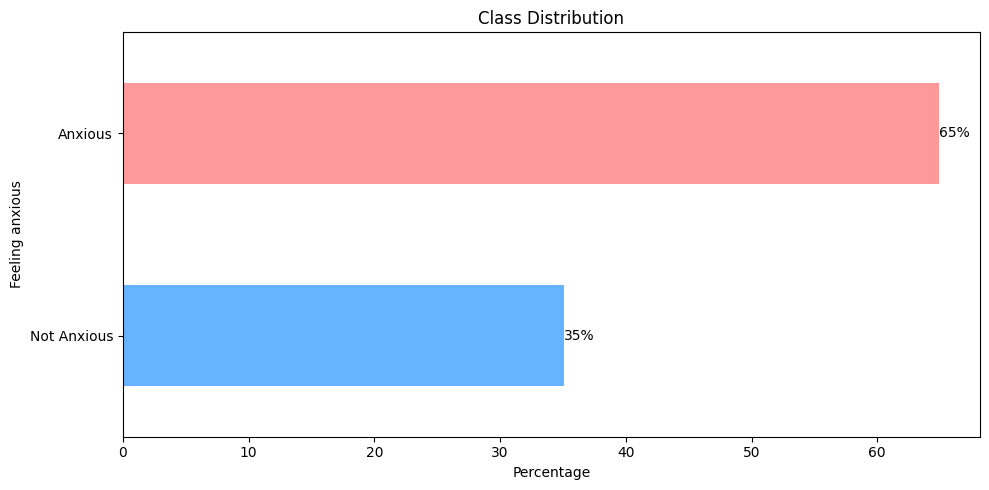

In [303]:
# Calculate class distribution for the 'Feeling anxious' column
class_distribution = df['Feeling anxious'].value_counts(normalize=True) * 100

# Create a horizontal bar plot for class distribution
plt.figure(figsize=(10, 5))
class_distribution.plot(kind='barh', color=['#ff9999', '#66b3ff'])

# Invert y-axis to have 'Not Anxious' at the bottom
plt.gca().invert_yaxis()

# Add the percentage text on each bar
for index, value in enumerate(class_distribution):
    plt.text(value, index, f'{value:.0f}%', va='center')

# Set plot title and labels
plt.title('Class Distribution')
plt.xlabel('Percentage')
plt.yticks(ticks=range(len(class_distribution)), labels=['Anxious', 'Not Anxious'])

# Show the plot
plt.tight_layout()
plt.show()

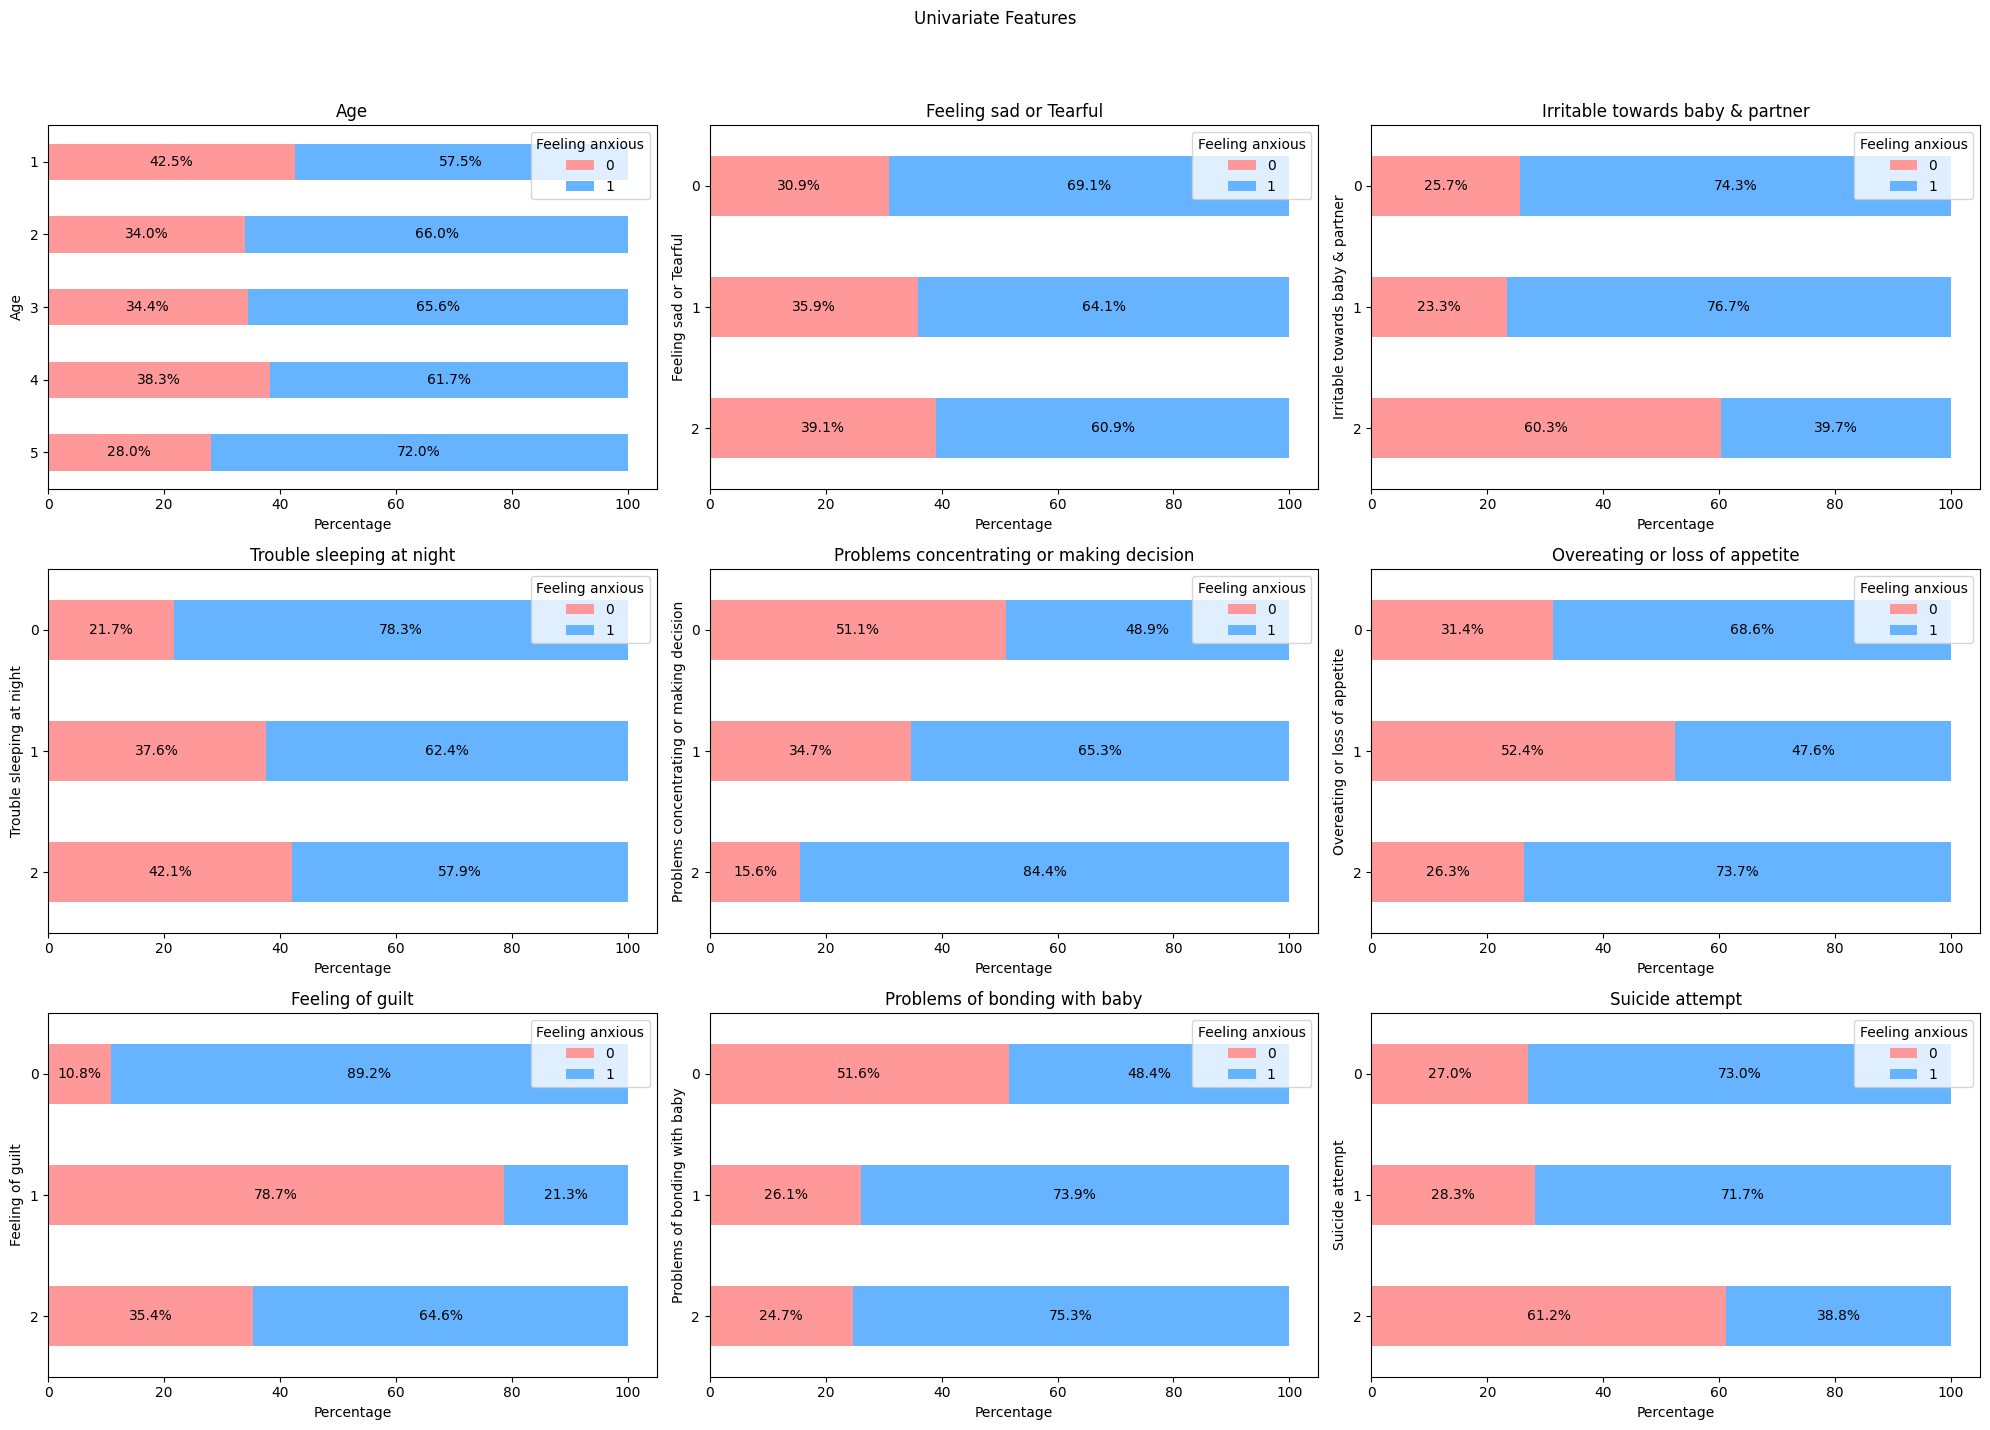

In [304]:
# Apply your preprocessing steps here...

# Define the features to plot
features = ['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
            'Trouble sleeping at night', 'Problems concentrating or making decision',
            'Overeating or loss of appetite', 'Feeling of guilt',
            'Problems of bonding with baby', 'Suicide attempt']

# Set up the matplotlib figure (e.g., 3 rows, 3 columns if you have 9 features)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.suptitle('Univariate Features')

# Flatten axes array for easy looping
axes = axes.flatten()

# Loop through the features and create a stacked bar plot for each
for i, feature in enumerate(features):
    # Calculate the distribution and percentages
    distribution = pd.crosstab(df[feature], df['Feeling anxious'], normalize='index') * 100

    # Plot stacked bar chart
    distribution.plot(kind='barh', stacked=True, ax=axes[i], color=['#ff9999', '#66b3ff'])
    axes[i].set_title(feature)
    axes[i].invert_yaxis()  # To match the example image
    axes[i].set_xlabel('Percentage')

    # Annotate percentages on the bars
    for rects in axes[i].containers:
        axes[i].bar_label(rects, fmt='%.1f%%', label_type='center')

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

In [305]:
print(df.columns)

Index(['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')


In [306]:
# Separating the features (X) and the target variable (y)
x = df.drop('Feeling anxious', axis=1)
y = df['Feeling anxious']
print(x.shape, y.shape)

(1491, 9) (1491,)


<Axes: >

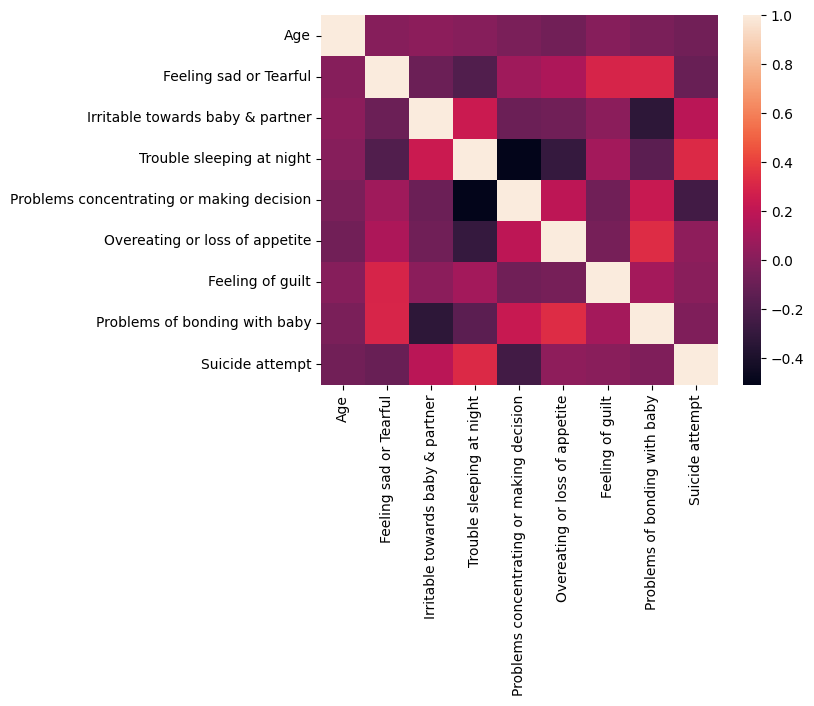

In [307]:
#Heatmap
corr = x.corr()
sns.heatmap(corr)

In [308]:
#Standardisation
meanX = x.mean()
stdX = np.std(x)

x = (x - meanX) / stdX
x

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,-0.104067,0.065199,0.047305,1.02955,0.088003,0.431485,-1.070798,0.011751,0.309667
1,0.671753,0.065199,-1.212196,-1.38977,0.088003,0.431485,0.071233,0.011751,-0.944988
2,-0.104067,0.065199,-1.212196,-0.18011,0.088003,0.431485,-1.070798,1.179794,-0.944988
3,-0.104067,0.065199,0.047305,-0.18011,0.088003,-0.808100,1.213264,-1.156292,-0.944988
4,0.671753,0.065199,-1.212196,1.02955,0.088003,-0.808100,-1.070798,0.011751,-0.944988
...,...,...,...,...,...,...,...,...,...
1498,-0.879887,0.065199,-1.212196,1.02955,-1.104837,-0.808100,1.213264,1.179794,-0.944988
1499,-1.655706,1.311495,-1.212196,-1.38977,1.280843,-0.808100,1.213264,0.011751,-0.944988
1500,-1.655706,-1.181098,1.306807,1.02955,-1.104837,-0.808100,0.071233,-1.156292,1.564322
1501,-1.655706,-1.181098,1.306807,-0.18011,1.280843,-0.808100,-1.070798,-1.156292,-0.944988


In [309]:
#Split data
X_train, X_test, y_train, y_test = train_test_split( x,y,test_size=0.2,random_state=0,shuffle=True)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1192, 9) (1192,) (299, 9) (299,)


**ML Models**

In [310]:
!pip install lime



[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


**for Anomaly detection IsolationForest**

In [311]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Fit the model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
predictions = iso_forest.fit_predict(X_scaled)

# The prediction is -1 for anomalies and 1 for normal observations
df['anomaly'] = predictions

# Count the number of anomalies and normal points
counts = df['anomaly'].value_counts()
anomalies = df[df['anomaly'] == -1]
normal = df[df['anomaly'] == 1]

# Output the counts
print(counts)

# Optionally, show some of the anomalies
print(anomalies.head())

anomaly
-1    1136
 1     355
Name: count, dtype: int64
   Age  Feeling sad or Tearful  Irritable towards baby & partner  \
0    3                       1                                 1   
1    4                       1                                 0   
2    3                       1                                 0   
3    3                       1                                 1   
4    4                       1                                 0   

   Trouble sleeping at night  Problems concentrating or making decision  \
0                          2                                          1   
1                          0                                          1   
2                          1                                          1   
3                          1                                          1   
4                          2                                          1   

   Overeating or loss of appetite  Feeling anxious  Feeling of guilt  \
0           

**SGDClassifier**

Training time(seconds): 0.009252786636352539s
Accuracy 0.76
kfold accuracy: 0.7316868008948546
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       115
           1       0.80      0.81      0.80       184

    accuracy                           0.76       299
   macro avg       0.74      0.74      0.74       299
weighted avg       0.75      0.76      0.76       299



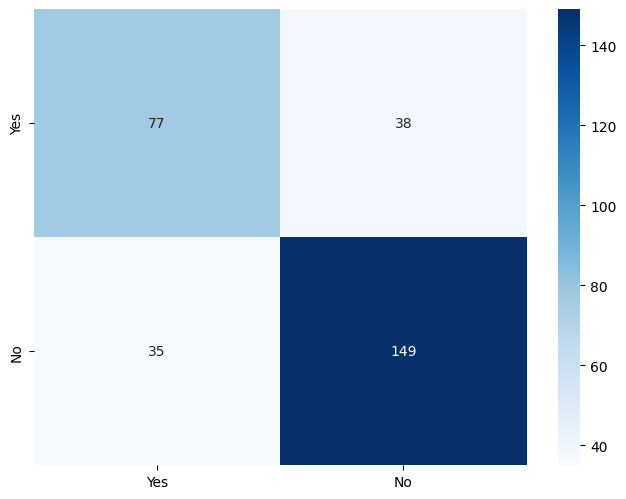

In [312]:
from sklearn.linear_model import SGDClassifier
import time
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = SGDClassifier()
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Linear Regression**

Training time(seconds): 0.014824151992797852s
Accuracy 0.78
kfold accuracy: 0.2658630688458654
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       115
           1       0.80      0.87      0.83       184

    accuracy                           0.78       299
   macro avg       0.78      0.76      0.76       299
weighted avg       0.78      0.78      0.78       299



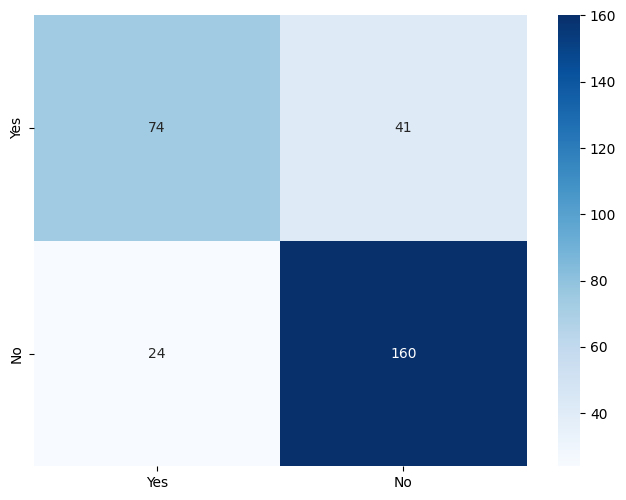

In [218]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = LinearRegression()
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Random Forest**

Training time(seconds): 0.11062908172607422s
Accuracy 0.86
kfold accuracy: 0.8537807606263981
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       115
           1       0.86      0.93      0.89       184

    accuracy                           0.86       299
   macro avg       0.87      0.84      0.85       299
weighted avg       0.86      0.86      0.86       299



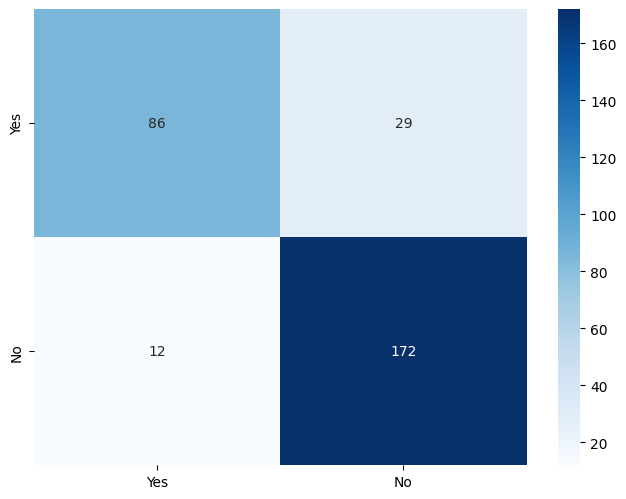

In [313]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = RandomForestClassifier(max_depth=4, random_state=0)
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Bayesian Ridge Regression**


Training time(seconds): 0.003869771957397461s
Accuracy 0.79
kfold accuracy: 0.2660567782797115
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       115
           1       0.80      0.88      0.84       184

    accuracy                           0.79       299
   macro avg       0.78      0.76      0.77       299
weighted avg       0.79      0.79      0.78       299



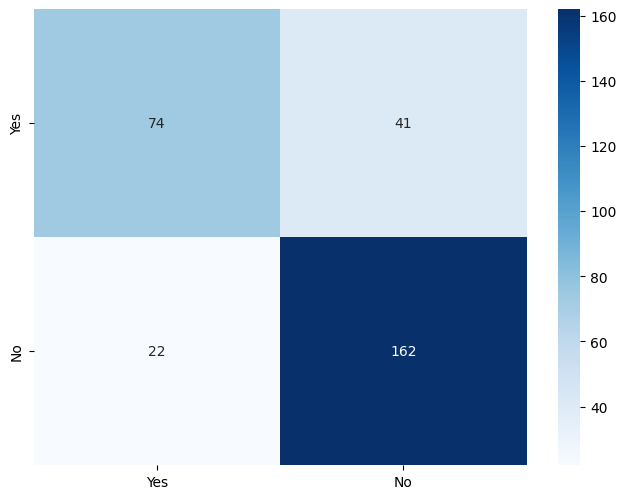

In [314]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = linear_model.BayesianRidge()
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**SVM**

Training time(seconds): 0.038812875747680664s
Accuracy 0.78
kfold accuracy: 0.7665816554809843
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       115
           1       0.79      0.86      0.83       184

    accuracy                           0.78       299
   macro avg       0.77      0.75      0.76       299
weighted avg       0.77      0.78      0.77       299



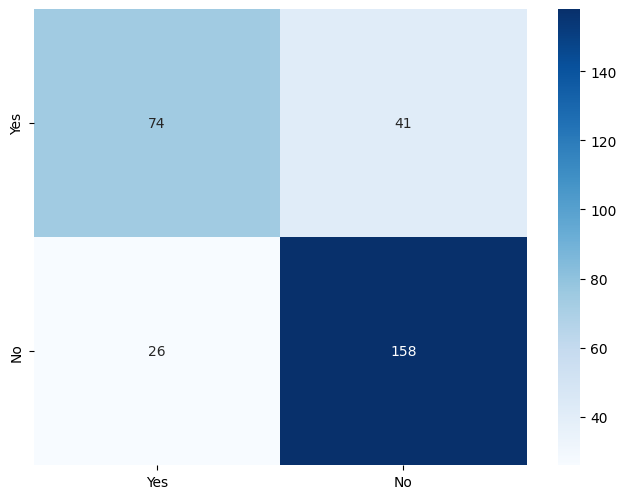

In [315]:
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = svm.SVC(kernel='linear')
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**KNeighbour Regression**

Training time(seconds): 0.0036950111389160156s
Accuracy 0.89
kfold accuracy: 0.873248322147651
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       115
           1       0.90      0.91      0.91       184

    accuracy                           0.89       299
   macro avg       0.88      0.88      0.88       299
weighted avg       0.89      0.89      0.89       299



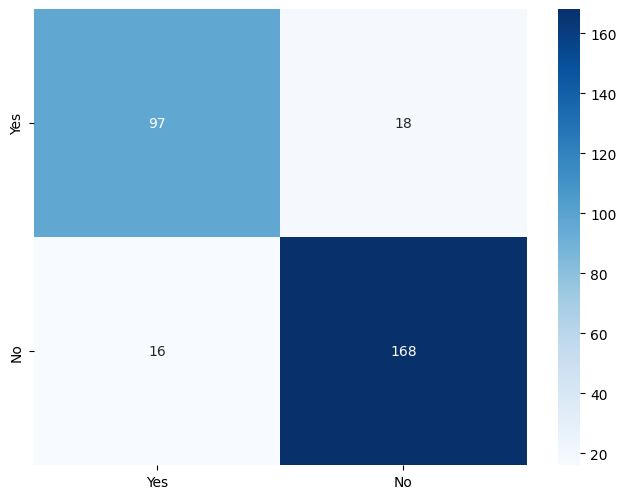

In [316]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = KNeighborsClassifier()
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Neural Networks(MLPClassifier)**

Training time(seconds): 0.5064146518707275s
Accuracy 0.92
kfold accuracy: 0.9322639821029082
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       115
           1       0.92      0.95      0.93       184

    accuracy                           0.92       299
   macro avg       0.92      0.91      0.91       299
weighted avg       0.92      0.92      0.92       299



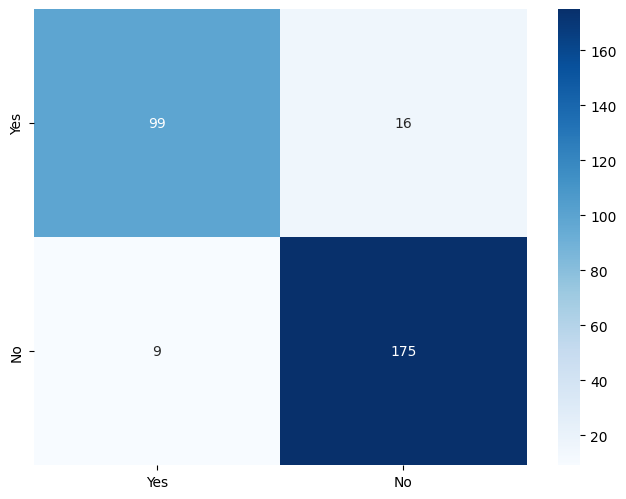

In [317]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = MLPClassifier()
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Logistic Regression**

Training time(seconds): 0.006555318832397461s
Accuracy 0.79
kfold accuracy: 0.7679194630872483
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       115
           1       0.80      0.88      0.83       184

    accuracy                           0.79       299
   macro avg       0.78      0.76      0.77       299
weighted avg       0.78      0.79      0.78       299



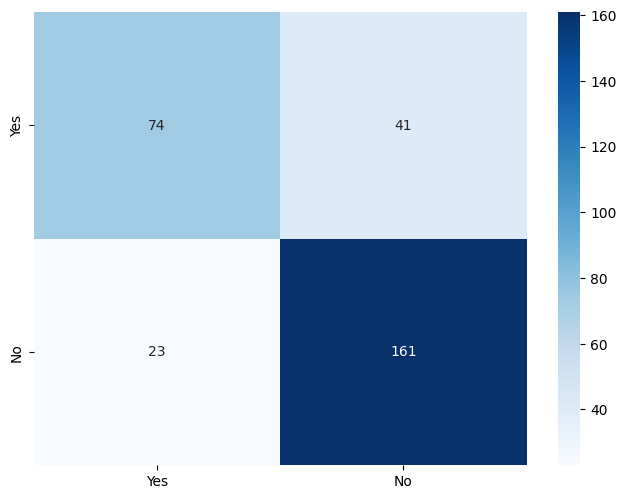

In [318]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = LogisticRegression(random_state=0)
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Gaussian Naïve Bayes**

Training time(seconds): 0.0039157867431640625s
Accuracy 0.77
kfold accuracy: 0.7659015659955257
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       115
           1       0.79      0.84      0.82       184

    accuracy                           0.77       299
   macro avg       0.75      0.74      0.75       299
weighted avg       0.76      0.77      0.76       299



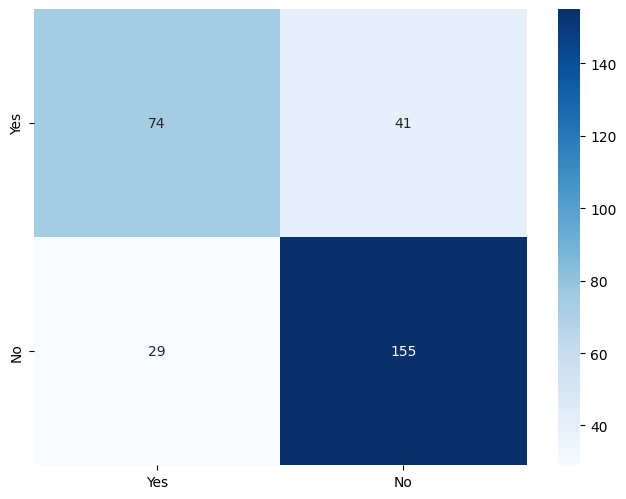

In [319]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = GaussianNB()
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Gradient Boosting Classifier  **

Training time(seconds): 0.12307405471801758s
Accuracy 0.92
kfold accuracy: 0.9027427293064877
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       115
           1       0.92      0.96      0.94       184

    accuracy                           0.92       299
   macro avg       0.92      0.91      0.92       299
weighted avg       0.92      0.92      0.92       299



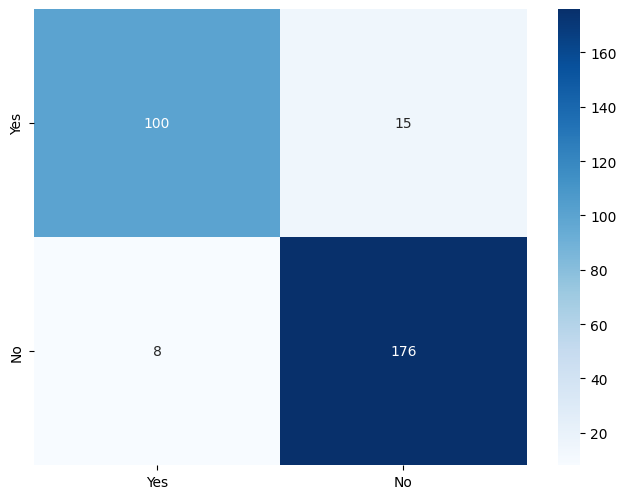

In [320]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = GradientBoostingClassifier(random_state=0)
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Decision Tree Classifier**

Training time(seconds): 0.004876852035522461s
Accuracy 0.99
kfold accuracy: 0.990612975391499
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       115
           1       0.99      0.99      0.99       184

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299



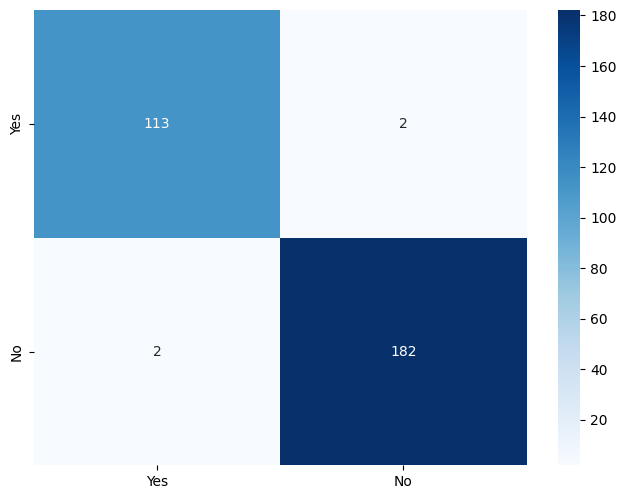

In [321]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = DecisionTreeClassifier(random_state=0)
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Meta Learner Model**

Training time(seconds): 2.3109681606292725s
Accuracy: 0.92
kfold accuracy: 0.9289127516778525
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       115
           1       0.94      0.93      0.94       184

    accuracy                           0.92       299
   macro avg       0.92      0.92      0.92       299
weighted avg       0.92      0.92      0.92       299



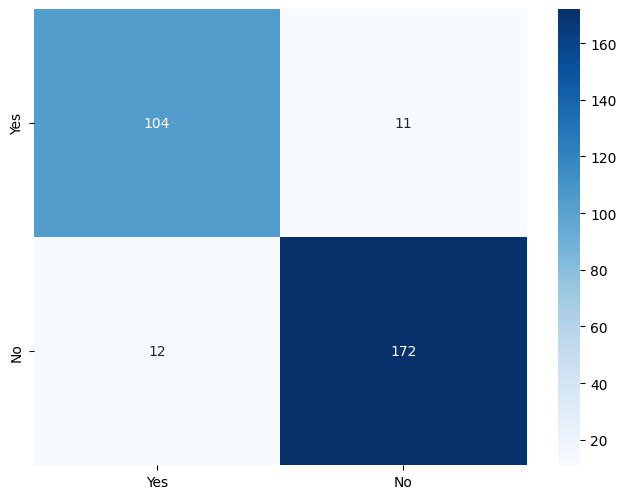

In [322]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#X_train, X_test, y_train, y_test = train_test_split( x,y,test_size=0.2,random_state=0,shuffle=True)

# Define base learners
base_learners = [
    ('dt1', DecisionTreeClassifier(max_depth=3, random_state=42)),
    ('dt2', KNeighborsClassifier()),
    ('lr', MLPClassifier())
]

# Define the meta-learner
meta_learner = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the stacking classifier
stacked_classifier = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

start = time.time()
# Train the stacked classifier
stacked_classifier.fit(X_train, y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")

# Evaluate the model
y_pred = stacked_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(stacked_classifier, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.round()))
cf_matrix=confusion_matrix(y_test, y_pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Meta Learner 2**

Training time(seconds): 1.1311001777648926s
Accuracy: 0.99
kfold accuracy: 0.9919552572706936
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       115
           1       0.99      1.00      0.99       184

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299



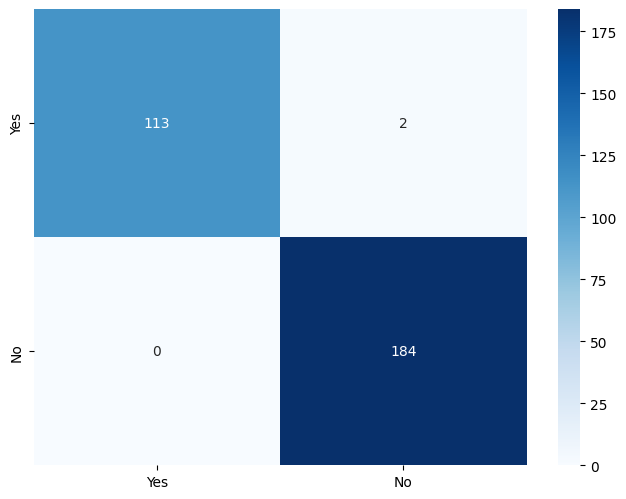

In [323]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#X_train, X_test, y_train, y_test = train_test_split( x,y,test_size=0.2,random_state=0,shuffle=True)

# Define base learners
base_learners = [
    ('dt1', DecisionTreeClassifier(max_depth=3, random_state=42)),
    ('dt2', KNeighborsClassifier()),
    ('lr', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Define the meta-learner
meta_learner = MLPClassifier()

# Create the stacking classifier
stacked_classifier = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

start = time.time()
# Train the stacked classifier
stacked_classifier.fit(X_train, y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")

# Evaluate the model
y_pred = stacked_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(stacked_classifier, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.round()))
cf_matrix=confusion_matrix(y_test, y_pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

#  Keep ONLY rows where label exists (so X and y match)
df2 = df.dropna(subset=["PPD_Label"]).copy()

#  Build X, y from the SAME df2
X = df2.drop(columns=["PPD_Label"])
y = df2["PPD_Label"]

#  Safety check
print("X:", X.shape, "y:", y.shape)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)
print("Split OK ✅")


X: (1503, 12) y: (1503,)
Split OK ✅


In [ ]:
import pandas as pd


df = pd.read_csv("ppd_labeled_dataset.csv")

# Clean column names (removes spaces / hidden tabs/newlines)
df.columns = df.columns.astype(str).str.strip()

print("Columns:", df.columns.tolist())


Columns: ['Timestamp', 'Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner', 'Trouble sleeping at night', 'Problems concentrating or making decision', 'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt', 'Problems of bonding with baby', 'Suicide attempt', 'PPD_SymptomScore', 'PPD_Label']


In [ ]:
# ✅  Verify column name EXACTLY (shows hidden chars)
print("Has PPD_Label?", "PPD_Label" in df.columns)
print("repr columns:")
for c in df.columns:
    if "PPD" in c:
        print(repr(c))

# ✅  Clean hidden spaces/quotes/zero-width chars
df.columns = (df.columns.astype(str)
              .str.replace("\u200b", "", regex=False)  # zero-width space
              .str.replace("\ufeff", "", regex=False)  # BOM
              .str.strip()
              .str.replace('"', '', regex=False)
              .str.replace("'", '', regex=False)
             )

print("After cleaning:", [repr(c) for c in df.columns if "PPD" in c])
print("Now has PPD_Label?", "PPD_Label" in df.columns)

#  Split
X = df.drop(columns=["PPD_Label"])
y = df["PPD_Label"]


Has PPD_Label? True
repr columns:
'PPD_SymptomScore'
'PPD_Label'
After cleaning: ["'PPD_SymptomScore'", "'PPD_Label'"]
Now has PPD_Label? True


In [329]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)


In [330]:
pip install imbalanced-learn



[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [331]:
from sklearn.model_selection import train_test_split

X2 = X.drop(columns=["Timestamp"], errors="ignore")
X2 = X2.apply(lambda c: pd.to_numeric(c, errors="coerce"))

X_train, X_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.2, random_state=42, stratify=y
)

imputer = SimpleImputer(strategy="median")
X_train_imp = imputer.fit_transform(X_train)
X_test_imp  = imputer.transform(X_test)

sm = SMOTE(random_state=42, k_neighbors=1)
X_train_res, y_train_res = sm.fit_resample(X_train_imp, y_train)


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

#  Drop Timestamp (string column)
X2 = X.drop(columns=["Timestamp"], errors="ignore")

#  Convert all to numeric (anything weird becomes NaN)
X2 = X2.apply(lambda c: pd.to_numeric(c, errors="coerce"))

#  Impute NaNs (median is good for these questionnaire features)
imputer = SimpleImputer(strategy="median")
X2_imp = imputer.fit_transform(X2)

#  SMOTE
sm = SMOTE(random_state=42, k_neighbors=1)
X_res, y_res = sm.fit_resample(X2_imp, y)

print("After SMOTE:", X_res.shape, y_res.shape)


After SMOTE: (2294, 10) (2294,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# y
y = df["PPD_Label"]

# X
X = df.drop(columns=["PPD_Label"], errors="ignore")
X = X.drop(columns=["Timestamp"], errors="ignore")

# numeric
X = X.apply(lambda c: pd.to_numeric(c, errors="coerce"))

# # impute NaNs
imputer = SimpleImputer(strategy="median")
X_imp = imputer.fit_transform(X)

# split
X_train, X_test, y_train, y_test = train_test_split(
    X_imp, y, test_size=0.2, random_state=42, stratify=y
)

# fit
stacked_classifier.fit(X_train, y_train)


StackingClassifier(estimators=[('dt1',
                                DecisionTreeClassifier(max_depth=3,
                                                       random_state=42)),
                               ('dt2', KNeighborsClassifier()),
                               ('lr', RandomForestClassifier(random_state=42))],
                   final_estimator=MLPClassifier())

In [335]:
# Build X exactly like training
X_pred = df.drop(columns=["PPD_Label"], errors="ignore").copy()
X_pred = X_pred.drop(columns=["Timestamp"], errors="ignore")
X_pred = X_pred.apply(lambda c: pd.to_numeric(c, errors="coerce"))

# Use the SAME imputer you fit earlier
X_pred_imp = imputer.transform(X_pred)

risk_scores = stacked_classifier.predict_proba(X_pred_imp)[:, 1]
risk_scores[:10]


array([0.99922931, 0.99922931, 0.99922931, 0.99922931, 0.99922931,
       0.99922931, 0.99922931, 0.99922931, 0.99916054, 0.99922931])

In [336]:
# Get predicted probabilities from the MDKR meta-learner
# column 1 is probability of class "1" (PPD present / high risk)
risk_scores_test = stacked_classifier.predict_proba(X_test)[:, 1]
print(risk_scores_test[:10])



[0.02362055 0.99922931 0.99922931 0.00843673 0.008875   0.01129664
 0.99922931 0.99922931 0.99922931 0.00843673]


In [337]:
print("Train features:", stacked_classifier.n_features_in_)
print("Current X columns:", X.shape[1])


Train features: 10
Current X columns: 11


In [338]:
def assign_therapy(p_ppd):
    """
    Map risk probability to therapy track and risk level.
    """
    if p_ppd < 0.65:
        return "Low Risk - Farming Game Therapy"
    elif p_ppd < 0.85:
        return "Moderate Risk - Nature Walk Therapy"
    else:
        return "Severe Risk - Escalate to Clinician"


In [339]:
# 1. Split features/label from your cleaned df
feature_cols = ['Age',
                'Feeling sad or Tearful',
                'Irritable towards baby & partner',
                'Trouble sleeping at night',
                'Problems concentrating or making decision',
                'Overeating or loss of appetite',
                'Feeling anxious',
                'Feeling of guilt',
                'Problems of bonding with baby',
                'Suicide attempt']

X = df[feature_cols].copy()
y = df['PPD_Label']      # or whatever you named the target (0/1)

# 2. Train the MDKR/stacked model (you already did this)
# stacked_classifier = ...



In [341]:
import numpy as np
import pandas as pd

X = df[feature_cols].copy()

# Convert age like "35-40" -> 37.5
def parse_age(a):
    if pd.isna(a):
        return np.nan
    a = str(a).strip()
    if "-" in a:
        lo, hi = a.split("-", 1)
        return (float(lo) + float(hi)) / 2
    return float(a)  # works if it's "23" etc.

X["Age"] = X["Age"].apply(parse_age)

# Ensure all columns numeric
X = X.apply(lambda c: pd.to_numeric(c, errors="coerce"))

# Fill any remaining NaNs (same idea you used before)
X = X.fillna(X.median(numeric_only=True))

risk_scores_all = stacked_classifier.predict_proba(X)[:, 1]
print(risk_scores_all[:10])


[0.99425734 0.99313579 0.03810467 0.03810467 0.99632449 0.01591499
 0.00908453 0.02762301 0.02651217 0.02191098]


In [342]:
df["PPD_RiskScore"] = stacked_classifier.predict_proba(X)[:, 1]


In [343]:
df[["PPD_RiskScore"]].head()


,PPD_RiskScore
0,0.994257
1,0.993136
2,0.038105
3,0.038105
4,0.996324


In [344]:
def get_risk_level(score):
    if score >= 0.85:
        return "High"
    elif score >= 0.65:
        return "Moderate"
    else:
        return "Low"

df["Risk_Level"] = df["PPD_RiskScore"].apply(get_risk_level)


In [275]:
print(df.columns.tolist())


['Timestamp', 'Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner', 'Trouble sleeping at night', 'Problems concentrating or making decision', 'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt', 'Problems of bonding with baby', 'Suicide attempt']


In [345]:
def assign_therapy(score):
    if score >= 0.85:
        return "Clinical_Escalation"
    elif score >= 0.65:
        return "Nature_Walk_Therapy"
    else:
        return "Farming_Game_Therapy"

df["Assigned_Therapy"] = df["PPD_RiskScore"].apply(assign_therapy)


In [346]:
df[["PPD_RiskScore", "Risk_Level", "Assigned_Therapy"]].head()


,PPD_RiskScore,Risk_Level,Assigned_Therapy
0,0.994257,High,Clinical_Escalation
1,0.993136,High,Clinical_Escalation
2,0.038105,Low,Farming_Game_Therapy
3,0.038105,Low,Farming_Game_Therapy
4,0.996324,High,Clinical_Escalation


In [347]:
df.to_csv("ppd_with_risk_and_therapy.csv", index=False)


In [351]:
df = pd.read_csv("post natal data.csv")
print(df.columns)


Index(['Timestamp', 'Age', 'Feeling sad or Tearful',
       'Irritable towards baby & partner', 'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')


In [353]:
df = pd.read_csv("ppd_labeled_dataset.csv")

print(df.columns.tolist())


['Timestamp', 'Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner', 'Trouble sleeping at night', 'Problems concentrating or making decision', 'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt', 'Problems of bonding with baby', 'Suicide attempt', 'PPD_SymptomScore', 'PPD_Label']


In [354]:
X = df[symptom_cols + ['Age']]
y = df['PPD_Label']   # ✅ correct column name

print("Label distribution:")
print(y.value_counts())
df.head()


Label distribution:
PPD_Label
1    1147
0     356
Name: count, dtype: int64


,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt,PPD_SymptomScore,PPD_Label
0,6/14/2022 20:02,35-40,1.0,1.0,1,1.0,1,1,0.0,1.0,1.0,7.0,1
1,6/14/2022 20:03,40-45,1.0,0.0,0,1.0,1,0,1.0,1.0,0.0,5.0,1
2,6/14/2022 20:04,35-40,1.0,0.0,1,1.0,1,1,0.0,0.5,0.0,5.5,1
3,6/14/2022 20:05,35-40,1.0,1.0,1,1.0,0,1,0.5,0.0,0.0,5.5,1
4,6/14/2022 20:06,40-45,1.0,0.0,1,1.0,0,1,0.0,1.0,0.0,5.0,1


In [355]:
print(df.columns.tolist())


['Timestamp', 'Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner', 'Trouble sleeping at night', 'Problems concentrating or making decision', 'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt', 'Problems of bonding with baby', 'Suicide attempt', 'PPD_SymptomScore', 'PPD_Label']


In [356]:
import pandas as pd

df = pd.read_csv("post natal data.csv")

# 1. Define mapping
mapping = {
    "Yes": 1,
    "No": 0,
    "Sometimes": 0.5,
    "Maybe": 0.5,
    "Two or more days a week": 1,
    "Often": 1,
    "Not at all": 0,
    "Not interested to say": 0.5
}

# 2. Apply mapping to all symptom columns
symptom_cols = [
    "Feeling sad or Tearful",
    "Irritable towards baby & partner",
    "Trouble sleeping at night",
    "Problems concentrating or making decision",
    "Overeating or loss of appetite",
    "Feeling anxious",
    "Feeling of guilt",
    "Problems of bonding with baby"
]

df[symptom_cols] = df[symptom_cols].replace(mapping)

# 3. Convert Suicide Attempt to binary
df["Suicide attempt"] = df["Suicide attempt"].replace(mapping)

# 4. Compute symptom severity score
df["Symptom_Score"] = df[symptom_cols].sum(axis=1)

# 5. Create final PPD label
df["PPD_Label"] = df.apply(
    lambda row: 1 if (row["Suicide attempt"] == 1 or row["Symptom_Score"] >= 4) else 0,
    axis=1
)

df.head()


,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Symptom_Score,PPD_Label
0,6/14/2022 20:02,35-40,1.0,1.0,1,1.0,1,1,0.0,1.0,1.0,7.0,1
1,6/14/2022 20:03,40-45,1.0,0.0,0,1.0,1,0,1.0,1.0,0.0,5.0,1
2,6/14/2022 20:04,35-40,1.0,0.0,1,1.0,1,1,0.0,0.5,0.0,5.5,1
3,6/14/2022 20:05,35-40,1.0,1.0,1,1.0,0,1,0.5,0.0,0.0,5.5,1
4,6/14/2022 20:06,40-45,1.0,0.0,1,1.0,0,1,0.0,1.0,0.0,5.0,1


In [357]:
df["PPD_SymptomScore"] = df[symptom_cols].sum(axis=1)


In [358]:
df["PPD_Label"].value_counts()


PPD_Label
1    1147
0     356
Name: count, dtype: int64

In [359]:
import pandas as pd

df = pd.read_csv("ppd_labeled_dataset.csv")
df.head()


,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt,PPD_SymptomScore,PPD_Label
0,6/14/2022 20:02,35-40,1.0,1.0,1,1.0,1,1,0.0,1.0,1.0,7.0,1
1,6/14/2022 20:03,40-45,1.0,0.0,0,1.0,1,0,1.0,1.0,0.0,5.0,1
2,6/14/2022 20:04,35-40,1.0,0.0,1,1.0,1,1,0.0,0.5,0.0,5.5,1
3,6/14/2022 20:05,35-40,1.0,1.0,1,1.0,0,1,0.5,0.0,0.0,5.5,1
4,6/14/2022 20:06,40-45,1.0,0.0,1,1.0,0,1,0.0,1.0,0.0,5.0,1


In [360]:
# Drop non-numeric / unwanted columns
X = df.drop(columns=["PPD_Label", "Timestamp", "Age"])  # keep Age_num if you created it
y = df["PPD_Label"]


In [361]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 1. Impute missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# 2. Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# (optional) back to DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [362]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)

train_meta = np.column_stack([
    dt.predict_proba(X_train)[:, 1],
    rf.predict_proba(X_train)[:, 1],
    knn.predict_proba(X_train)[:, 1]
])

test_meta = np.column_stack([
    dt.predict_proba(X_test)[:, 1],
    rf.predict_proba(X_test)[:, 1],
    knn.predict_proba(X_test)[:, 1]
])

mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=500)
mlp.fit(train_meta, y_train)


MLPClassifier(hidden_layer_sizes=(10,), max_iter=500)

In [363]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# MDKR predictions on test set
y_pred = mlp.predict(test_meta)

print("MDKR Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


MDKR Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       239

    accuracy                           1.00       301
   macro avg       1.00      1.00      1.00       301
weighted avg       1.00      1.00      1.00       301


Confusion Matrix:
 [[ 62   0]
 [  0 239]]


In [364]:
# Base model predictions
y_dt  = dt.predict(X_test)
y_rf  = rf.predict(X_test)
y_knn = knn.predict(X_test)

print("DT Accuracy :", accuracy_score(y_test, y_dt))
print("RF Accuracy :", accuracy_score(y_test, y_rf))
print("KNN Accuracy:", accuracy_score(y_test, y_knn))
print("MDKR (Meta-MLP) Accuracy:", accuracy_score(y_test, y_pred))


DT Accuracy : 1.0
RF Accuracy : 1.0
KNN Accuracy: 0.9634551495016611
MDKR (Meta-MLP) Accuracy: 1.0


In [371]:
import numpy as np
import pandas as pd

EXPECTED_COLS = list(imputer.feature_names_in_)  # the 10 features above

MAPPING = {
    "Yes": 1, "No": 0,
    "Sometimes": 0.5, "Maybe": 0.5, "Not interested to say": 0.5,
    "Two or more days a week": 1,
    "Often": 1,
    "Not at all": 0
}


In [ ]:
def predict_ppd_and_therapy(user_dict):
    # Build 1-row dataframe with EXACT expected columns,empty rows
    X_new = pd.DataFrame([{c: np.nan for c in EXPECTED_COLS}])

    # Fill provided answers (only those that match expected cols)
    for k, v in user_dict.items():
        if k in X_new.columns:
            X_new.loc[0, k] = v

    # Map text -> numeric for all symptom columns (except SymptomScore)
    for c in EXPECTED_COLS:
        if c != "PPD_SymptomScore":
            X_new[c] = X_new[c].astype(str).str.strip().map(MAPPING)

    # If SymptomScore missing, compute it as sum of symptom numeric values
    if pd.isna(X_new.loc[0, "PPD_SymptomScore"]):
        X_new.loc[0, "PPD_SymptomScore"] = float(
            X_new.drop(columns=["PPD_SymptomScore"]).sum(axis=1).iloc[0]
        )

    # Ensure numeric
    X_new = X_new.apply(lambda col: pd.to_numeric(col, errors="coerce"))

    # Impute + scale
    X_imp = imputer.transform(X_new)
    X_sc  = scaler.transform(X_imp)

    # Predict
    p = stacked_classifier.predict_proba(X_sc)[0, 1]
    ppd_percent = p * 100

    # Risk + therapy
    if p >= 0.85:
        risk = "High"
        therapy = "Severe Risk - Escalate to Clinician"
    elif p >= 0.65:
        risk = "Moderate"
        therapy = "Moderate Risk - Nature Walk Therapy"
    else:
        risk = "Low"
        therapy = "Low Risk - Farming Game Therapy"

    return ppd_percent, risk, therapy


In [375]:
# Show what score your example produced
tmp = pd.DataFrame([example_user])
for c in EXPECTED_COLS:
    if c != "PPD_SymptomScore":
        tmp[c] = tmp[c].astype(str).str.strip().map(MAPPING)

print("Symptom values:", tmp.drop(columns=["PPD_SymptomScore"], errors="ignore").iloc[0].to_dict())
print("Computed score:", tmp.sum(axis=1).iloc[0])


Symptom values: {'Feeling sad or Tearful': 1.0, 'Irritable towards baby & partner': 0.5, 'Trouble sleeping at night': 1.0, 'Problems concentrating or making decision': 1.0, 'Overeating or loss of appetite': 1.0, 'Feeling anxious': 1.0, 'Feeling of guilt': 0.5, 'Problems of bonding with baby': 0.5, 'Suicide attempt': 0.0}
Computed score: 6.5


In [373]:
example_user = {
    "Feeling sad or Tearful": "Yes",
    "Irritable towards baby & partner": "Sometimes",
    "Trouble sleeping at night": "Two or more days a week",
    "Problems concentrating or making decision": "Yes",
    "Overeating or loss of appetite": "Yes",
    "Feeling anxious": "Yes",
    "Feeling of guilt": "Maybe",
    "Problems of bonding with baby": "Sometimes",
    "Suicide attempt": "No"
    # PPD_SymptomScore optional (auto computed)
}


In [374]:
ppd_percent, risk, therapy = predict_ppd_and_therapy(example_user)
print(f"PPD Risk: {ppd_percent:.2f}%")
print(f"Risk Level: {risk}")
print(f"Recommended Therapy: {therapy}")


PPD Risk: 2.01%
Risk Level: Low
Recommended Therapy: Low Risk - Farming Game Therapy


In [377]:
def compute_tmd(subscale_scores, K=100):
    """
    subscale_scores: dict with keys:
      'T', 'D', 'A', 'F', 'C', 'V'
    values: summed score for each subscale (0–4 per item)

    Returns: TMD (float)
    """
    T = subscale_scores.get("T", 0)
    D = subscale_scores.get("D", 0)
    A = subscale_scores.get("A", 0)
    F = subscale_scores.get("F", 0)
    C = subscale_scores.get("C", 0)
    V = subscale_scores.get("V", 0)

    TMD = (T + D + A + F + C) - V + K
    return TMD


def compute_delta_tmd(pre_scores, post_scores, K=100):
    """
    pre_scores, post_scores: same format as above
    Returns: (TMD_pre, TMD_post, delta_TMD)
    """
    TMD_pre = compute_tmd(pre_scores, K=K)
    TMD_post = compute_tmd(post_scores, K=K)
    delta_TMD = TMD_pre - TMD_post   # >0 means improvement
    return TMD_pre, TMD_post, delta_TMD


In [378]:
pre = {
    "T": 18,
    "D": 24,
    "A": 12,
    "F": 16,
    "C": 10,
    "V": 8
}

post = {
    "T": 10,
    "D": 16,
    "A": 6,
    "F": 9,
    "C": 5,
    "V": 12
}

TMD_pre, TMD_post, delta_TMD = compute_delta_tmd(pre, post)

print("TMD_pre :", TMD_pre)
print("TMD_post:", TMD_post)
print("ΔTMD    :", delta_TMD)

if delta_TMD > 0:
    print("Mood improved ✅")
elif delta_TMD < 0:
    print("Mood worsened ❌")
else:
    print("No change in mood")


TMD_pre : 172
TMD_post: 134
ΔTMD    : 38
Mood improved ✅


In [379]:
pip install streamlit



[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [380]:
import pandas as pd
import numpy as np

def preprocess_prams_for_model(df_new: pd.DataFrame, feature_cols):
    """
    Apply EXACTLY the same preprocessing you used for training.
    df_new: 1-row DataFrame with raw questionnaire answers.
    """
    # ---------- TODO: COPY YOUR PREPROCESSING HERE ----------
    # Example mapping – REPLACE with your real one
    yes_no_cols = [
        "Feeling sad or Tearful",
        "Irritable towards baby & partner",
        "Feeling lonely or unsupported",
        "Feeling of guilt",
        "Problems of bonding with baby",
        "Suicide attempt",
        # add any other yes/no columns you used
    ]
    for col in yes_no_cols:
        if col in df_new.columns:
            df_new[col] = df_new[col].map({
                "Yes": 1,
                "No": 0,
                "Sometimes": 1,
                "Maybe": 1,
                "Not interested to say": 0.5
            })

    # Example frequency mapping
    freq_map = {
        "Not at all": 0,
        "Several days": 1,
        "Two or more days a week": 2,
        "Nearly every day": 3,
        "Often": 2,
        "Not interested to say": 0.5
    }
    freq_cols = [
        "Frequency of low mood",
        "Frequency of anxiety",
        # etc., add any frequency-like columns you used
    ]
    for col in freq_cols:
        if col in df_new.columns:
            df_new[col] = df_new[col].replace(freq_map)

    # Example age mapping
    age_map = {
        "<20": 0,
        "20-25": 1,
        "25-30": 2,
        "30-35": 3,
        "35-40": 4,
        "40-45": 5,
        "45-50": 6,
        "50+": 7
    }
    if "Age" in df_new.columns:
        df_new["Age"] = df_new["Age"].replace(age_map)

    # --------------------------------------------------------

    # Ensure every feature column exists
    for col in feature_cols:
        if col not in df_new.columns:
            df_new[col] = 0

    # Order columns exactly like during training
    df_new = df_new[feature_cols]

    return df_new


def predict_ppd_and_therapy(user_answers: dict):
    """
    user_answers: dict like {"Age": "35-40", "Feeling sad or Tearful": "Yes", ...}
    Returns:
       ppd_percent, risk_level_label, therapy_label
    """
    # Load saved objects
    import joblib
    imputer = joblib.load("imputer.pkl")
    scaler = joblib.load("scaler.pkl")
    dt = joblib.load("dt_model.pkl")
    rf = joblib.load("rf_model.pkl")
    knn = joblib.load("knn_model.pkl")
    meta_model = joblib.load("mdkr_meta_model.pkl")
    feature_cols = joblib.load("feature_cols.pkl")

    # Convert dict → DataFrame & preprocess
    df_new = pd.DataFrame([user_answers])
    df_new = preprocess_prams_for_model(df_new, feature_cols)

    # Impute & scale
    X_imp = imputer.transform(df_new)
    X_sc = scaler.transform(X_imp)

    # Base model probabilities
    p_dt = dt.predict_proba(X_sc)[:, 1]
    p_rf = rf.predict_proba(X_sc)[:, 1]
    p_knn = knn.predict_proba(X_sc)[:, 1]

    meta_features = np.column_stack([p_dt, p_rf, p_knn])
    ppd_prob = meta_model.predict_proba(meta_features)[:, 1][0]  # 0–1
    ppd_percent = ppd_prob * 100

    # -------- Threshold-based therapy assignment (your rule) ----------
    if ppd_percent >= 85:
        risk_level = "High Risk"
        therapy_label = "Clinician Escalation"
    elif ppd_percent >= 65:
        risk_level = "Moderate Risk"
        therapy_label = "Nature Walk Therapy"
    else:
        risk_level = "Low Risk"
        therapy_label = "User Choice: Nature Walk or Farming Game"
    # ------------------------------------------------------------------

    return ppd_percent, risk_level, therapy_label


In [ ]:
import joblib

#  Make sure X is your FINAL training feature dataframe (no target column)
print("Number of feature columns:", len(X.columns))

#  Save the column list
feature_cols = list(X.columns)
joblib.dump(feature_cols, "feature_cols.pkl")

print("Saved feature_cols.pkl with", len(feature_cols), "columns")


Number of feature columns: 10
Saved feature_cols.pkl with 10 columns


In [382]:
import os

print("Current working directory:", os.getcwd())
print(os.listdir())


Current working directory: /Users/abhilavanya/Downloads/Final Year 
['scaler.pkl', 'mdkr_meta_model.pkl', 'post natal data.csv', 'dt_model.pkl', '.DS_Store', 'requirements.txt', 'ppd_with_risk_and_therapy.csv', 'rf_model.pkl', 'FYP.ipynb', 'feature_cols.pkl', 'app.py', 'ppd_sessions_history.csv', 'venv', 'imputer.pkl', '.git', 'ppd_labeled_dataset.csv', 'knn_model.pkl']


In [383]:
example_user = {
    "Age": "35-40",
    "Feeling sad or Tearful": "Yes",
    "Irritable towards baby & partner": "Yes",
    "Feeling lonely or unsupported": "Yes",
    "Feeling of guilt": "Yes",
    "Problems of bonding with baby": "Yes",
    "Suicide attempt": "No",
    # add all fields your model expects
}

ppd_percent, risk, therapy = predict_ppd_and_therapy(example_user)
print(f"PPD Risk: {ppd_percent:.2f}%")
print(f"Risk Level: {risk}")
print(f"Therapy: {therapy}")


PPD Risk: 7.10%
Risk Level: Low Risk
Therapy: User Choice: Nature Walk or Farming Game
